<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression reference code

---

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1">Load the data</a></span></li><li><span><a href="#Specify-predictor-matrix-and-target-variable" data-toc-modified-id="Specify-predictor-matrix-and-target-variable-2">Specify predictor matrix and target variable</a></span></li><li><span><a href="#Get-train-test-split" data-toc-modified-id="Get-train-test-split-3">Get train-test split</a></span></li><li><span><a href="#Standardize-the-data" data-toc-modified-id="Standardize-the-data-4">Standardize the data</a></span></li><li><span><a href="#Fit-a-linear-regression-model" data-toc-modified-id="Fit-a-linear-regression-model-5">Fit a linear regression model</a></span></li><li><span><a href="#Fit-a-Ridge-model" data-toc-modified-id="Fit-a-Ridge-model-6">Fit a Ridge model</a></span></li><li><span><a href="#Fit-a-Lasso-model" data-toc-modified-id="Fit-a-Lasso-model-7">Fit a Lasso model</a></span></li><li><span><a href="#Fit-a-RidgeCV-model" data-toc-modified-id="Fit-a-RidgeCV-model-8">Fit a RidgeCV model</a></span></li><li><span><a href="#Fit-a-LassoCV-model" data-toc-modified-id="Fit-a-LassoCV-model-9">Fit a LassoCV model</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes, load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

## Load the data

In [3]:
# load the data
data = load_diabetes()

In [4]:
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

## Specify predictor matrix and target variable

In [5]:
# specify predictor matrix and target variable
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

## Get train-test split

In [6]:
# get train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

## Standardize the data

In [7]:
# standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

## Fit a linear regression model

In [8]:
# create a linear regression model instance
model = LinearRegression()

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.36653529 0.49962128 0.4009883  0.54757847 0.52418711]
Mean cross-validated training score: 0.46778209239489427
Training Score: 0.533228642689112
Test Score: 0.4384360401733268


In [9]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-1.449669,1.449669
sex,-12.937877,12.937877
bmi,25.402970,25.402970
bp,15.616996,15.616996
s1,-27.609799,27.609799
s2,15.672747,15.672747
s3,-1.310098,1.310098
s4,6.625359,6.625359
s5,32.182990,32.182990
s6,3.019814,3.019814


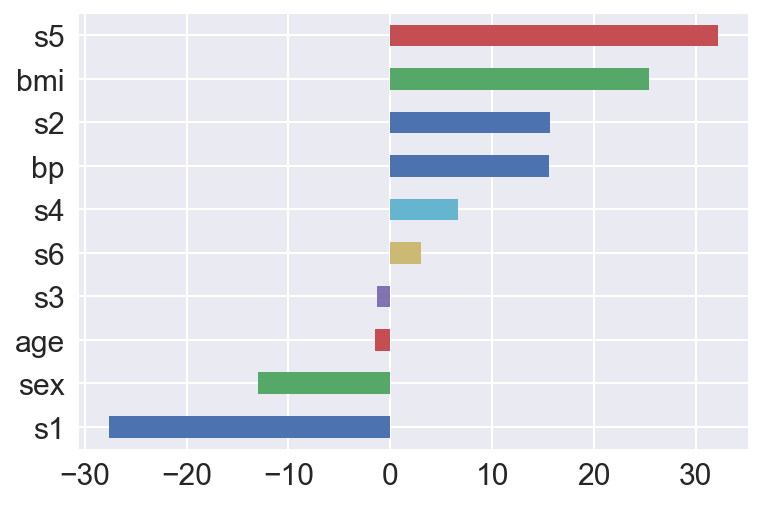

In [10]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

## Fit a Ridge model

In [11]:
# create a Ridge model instance
model = Ridge(alpha=21)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.38611262 0.50398026 0.43823966 0.5520589  0.52333993]
Mean cross-validated training score: 0.48074627112058266
Training Score: 0.5308991765209591
Test Score: 0.4319337703936592


In [12]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-1.047129,1.047129
sex,-11.855951,11.855951
bmi,24.602814,24.602814
bp,14.866698,14.866698
s1,-4.373441,4.373441
s2,-2.400336,2.400336
s3,-10.441232,10.441232
s4,5.010447,5.010447
s5,21.905003,21.905003
s6,3.671223,3.671223


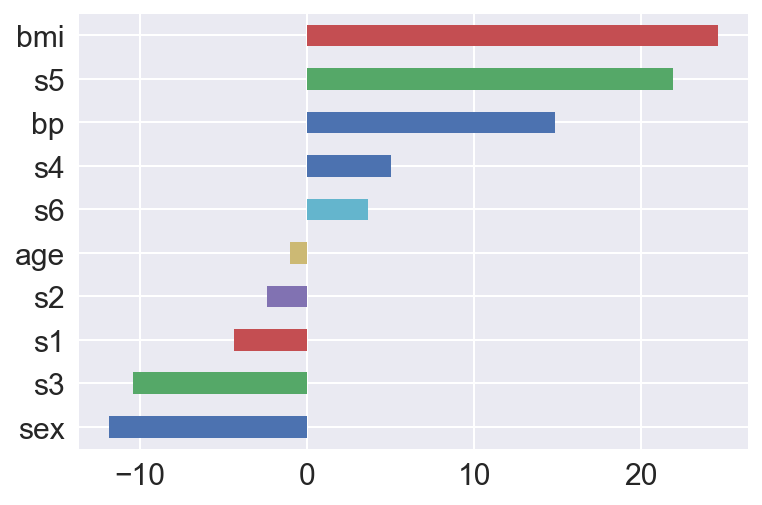

In [13]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

## Fit a Lasso model

In [14]:
# create a Lasso model instance
model = Lasso(alpha=0.35)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.37219465 0.51258123 0.42869098 0.55362436 0.52594589]
Mean cross-validated training score: 0.47860742314801846
Training Score: 0.5318196412757628
Test Score: 0.43202015275679007


In [15]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-0.969439,0.969439
sex,-12.169458,12.169458
bmi,25.564524,25.564524
bp,14.982724,14.982724
s1,-6.453091,6.453091
s2,-0.000000,0.000000
s3,-10.805683,10.805683
s4,2.742000,2.742000
s5,24.399334,24.399334
s6,2.823150,2.823150


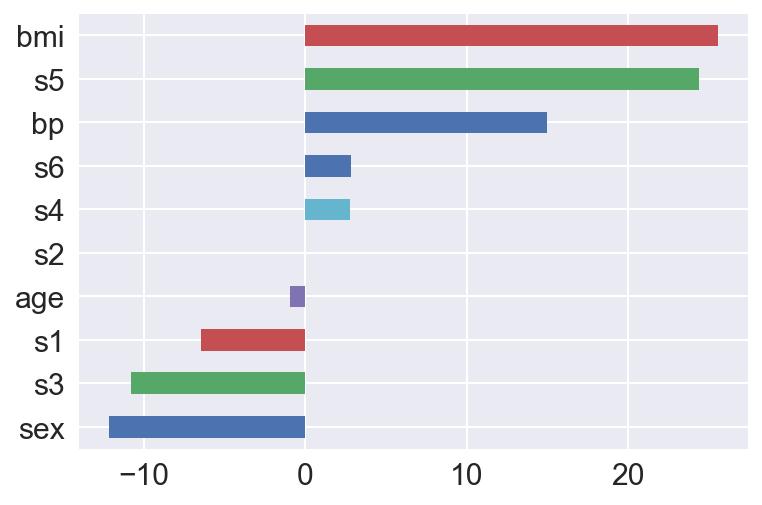

In [16]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

## Fit a RidgeCV model

In [17]:
# create a RidgeCV model instance
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 21.54434690031882
Training score: 0.5308503777787441
Test Score: 0.4319504433780217


In [18]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-1.037276,1.037276
sex,-11.832096,11.832096
bmi,24.576819,24.576819
bp,14.851334,14.851334
s1,-4.295065,4.295065
s2,-2.455987,2.455987
s3,-10.452716,10.452716
s4,5.024122,5.024122
s5,21.844234,21.844234
s6,3.683815,3.683815


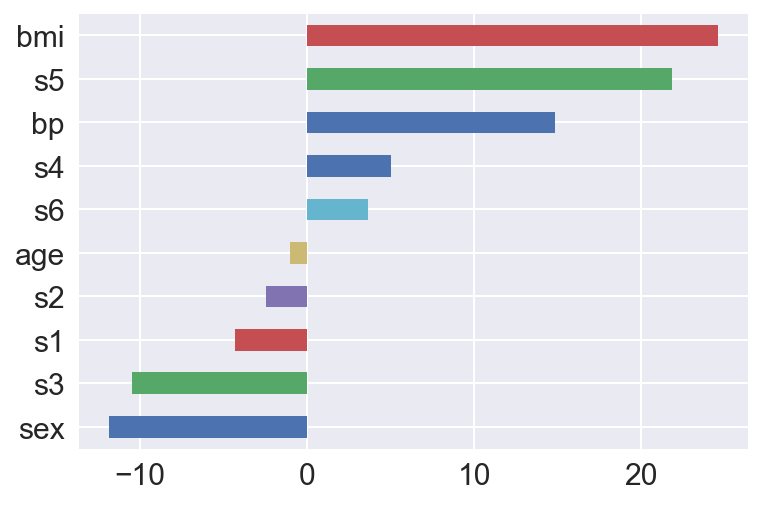

In [19]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

## Fit a LassoCV model

In [20]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.3593813663804626
Training score: 0.5318025315281587
Test Score: 0.4320179460871971


In [21]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-0.956981,0.956981
sex,-12.152088,12.152088
bmi,25.561615,25.561615
bp,14.968865,14.968865
s1,-6.393490,6.393490
s2,-0.000000,0.000000
s3,-10.856287,10.856287
s4,2.670422,2.670422
s5,24.387567,24.387567
s6,2.816100,2.816100


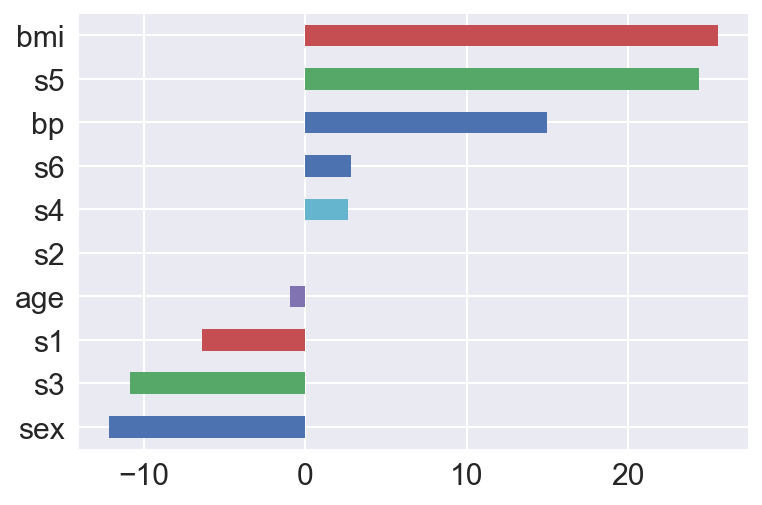

In [22]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')